**Project – Analyzing the trends of COVID-19 with Python**


Problem Statement:

Given data about COVID 19 patients, write code to visualize the impact and analyze the trend of rate of infection and recovery as well as make predictions about the number of cases expected a week in future based on the current trends


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px

In [4]:
data = pd.read_csv("/content/covid_19_clean_complete.csv")
data

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [5]:
data.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered', 'Active', 'WHO Region'],
      dtype='object')

In [7]:
data.rename(columns={"Date":"date","Province/State":"state","Country/Region":"country","Lat":"lat","Long":"long","Confirmed":"confirmed","Deaths":"deaths","Recovered":"recovered"
,"Active":"active","WHO Region":"WHO"},inplace=True)

data

,state,country,lat,long,date,confirmed,deaths,recovered,active,WHO
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [8]:
data["date"].max()

'2020-07-27'

In [10]:
top = data[data["date"] == data["date"].max()]
top

,state,country,lat,long,date,confirmed,deaths,recovered,active,WHO
48807,NaN,Afghanistan,33.939110,67.709953,2020-07-27,36263,1269,25198,9796,Eastern Mediterranean
48808,NaN,Albania,41.153300,20.168300,2020-07-27,4880,144,2745,1991,Europe
48809,NaN,Algeria,28.033900,1.659600,2020-07-27,27973,1163,18837,7973,Africa
48810,NaN,Andorra,42.506300,1.521800,2020-07-27,907,52,803,52,Europe
48811,NaN,Angola,-11.202700,17.873900,2020-07-27,950,41,242,667,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [12]:
w = data.pivot_table(index='country', values=['confirmed', 'active', 'deaths', 'recovered'], aggfunc='sum').reset_index()
w

,country,active,confirmed,deaths,recovered
0,Afghanistan,1089052,1936390,49098,798240
1,Albania,72117,196702,5708,118877
2,Algeria,345886,1179755,77972,755897
3,Andorra,19907,94404,5423,69074
4,Angola,15011,22662,1078,6573
...,...,...,...,...,...
182,West Bank and Gaza,170967,233461,1370,61124
183,Western Sahara,190,901,63,648
184,Yemen,25694,67180,17707,23779
185,Zambia,43167,129421,2643,83611


In [13]:
fig=px.choropleth(w,locations='country',locationmode='country names',color='deaths',hover_name='country',
                 range_color=[10000,10000000],color_continuous_scale="Rainbow",title='Death cases acorss Countries')
fig.show()

Text(0, 0.5, 'Cases total')

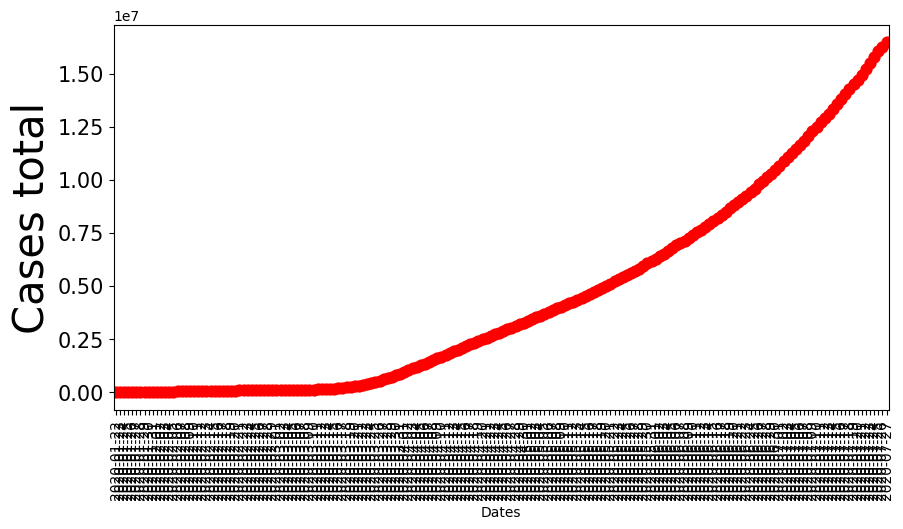

In [14]:
plt.figure(figsize=(10,5))                                     #plot for confirmed cases
t_cases=data.groupby('date')['confirmed'].sum().reset_index()
t_cases['date']=pd.to_datetime(t_cases['date'])

a=sns.pointplot(x=t_cases.date.dt.date,y=t_cases.confirmed,color='r')
a.set(xlabel='Dates',ylabel='Cases total')

plt.xticks(rotation=90,fontsize=10)
plt.yticks(fontsize=15)
plt.xlabel('Dates',fontsize=10)
plt.ylabel('Cases total',fontsize=30)

In [ ]:
t_cases

,date,confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


In [16]:
t_actives = w.groupby(by="country")["active"].sum().sort_values(ascending=False).head(20).reset_index()  ##Top 20 countries having most active cases
t_actives

,country,active
0,US,156981121
1,Brazil,31094060
2,United Kingdom,22624595
3,Russia,19668578
4,India,15987913
5,France,10980287
6,Spain,9277432
7,Canada,8656985
8,Peru,7748957
9,Italy,7363518


Text(0, 0.5, 'Countryl')

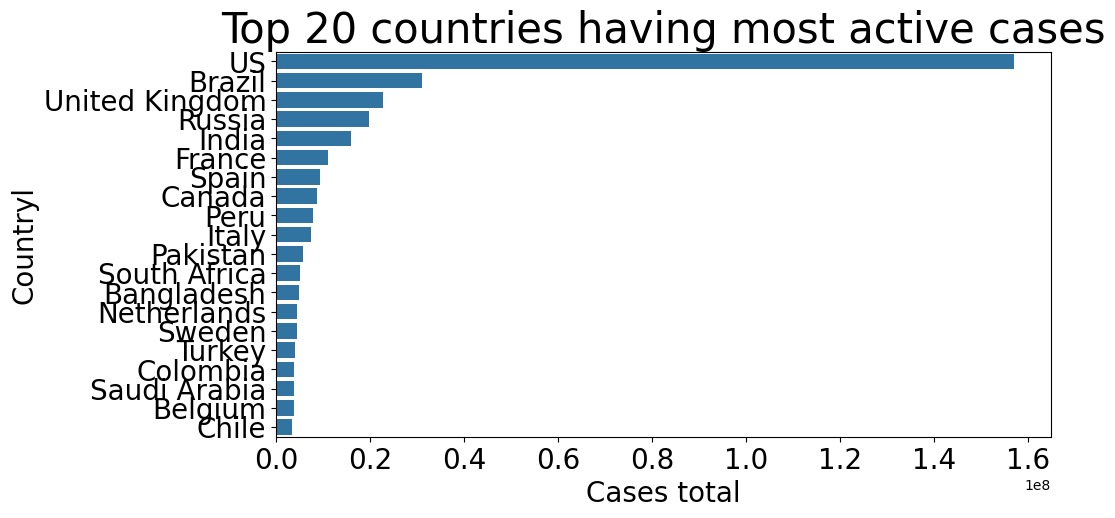

In [17]:
plt.figure(figsize=(10,5))
plt.title('Top 20 countries having most active cases',fontsize=30)
a=sns.barplot(x=t_actives.active,y=t_actives.country)
a.set(xlabel='Cases total',ylabel='Country')

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Cases total',fontsize=20)
plt.ylabel('Countryl',fontsize=20)

In [18]:
t_deaths = w.groupby(by="country")["deaths"].sum().sort_values(ascending=False).head(20).reset_index()        ##Top 20 countries having most death
t_deaths

,country,deaths
0,US,11011411
1,United Kingdom,3997775
2,Brazil,3938034
3,Italy,3707717
4,France,3048524
5,Spain,3033030
6,Mexico,1728277
7,India,1111831
8,Iran,1024136
9,Belgium,963679


Text(0, 0.5, 'Country')

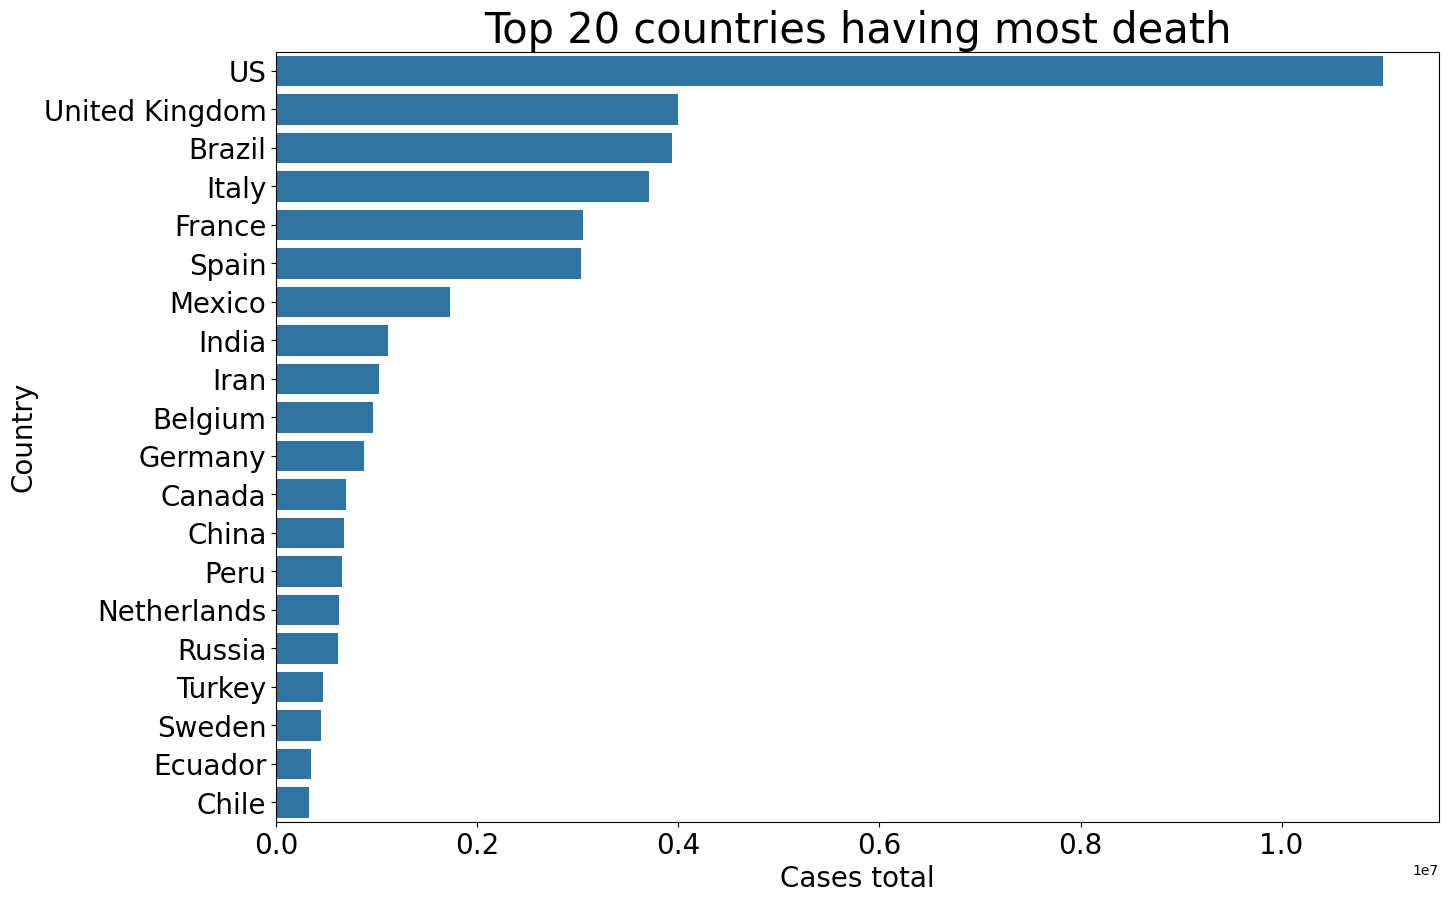

In [19]:
plt.figure(figsize=(15,10))

plt.title('Top 20 countries having most death',fontsize=30)
a=sns.barplot(x=t_deaths.deaths,y=t_deaths.country)

a.set(xlabel='Cases total',ylabel='Country')

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Cases total',fontsize=20)
plt.ylabel('Country',fontsize=20)

In [20]:
US = data[data.country=="US"]
Us = US.groupby(by="date").agg({"recovered": "sum", "confirmed": "sum", "active": "sum", "deaths": "sum"}).reset_index()
US

,state,country,lat,long,date,confirmed,deaths,recovered,active,WHO
223,NaN,US,40.0,-100.0,2020-01-22,1,0,0,1,Americas
484,NaN,US,40.0,-100.0,2020-01-23,1,0,0,1,Americas
745,NaN,US,40.0,-100.0,2020-01-24,2,0,0,2,Americas
1006,NaN,US,40.0,-100.0,2020-01-25,2,0,0,2,Americas
1267,NaN,US,40.0,-100.0,2020-01-26,5,0,0,5,Americas
...,...,...,...,...,...,...,...,...,...,...
47986,NaN,US,40.0,-100.0,2020-07-23,4038816,144430,1233269,2661117,Americas
48247,NaN,US,40.0,-100.0,2020-07-24,4112531,145560,1261624,2705347,Americas
48508,NaN,US,40.0,-100.0,2020-07-25,4178970,146465,1279414,2753091,Americas
48769,NaN,US,40.0,-100.0,2020-07-26,4233923,146935,1297863,2789125,Americas


In [22]:
India= data[data.country=="India"]
India = India.groupby(by="date").agg({"recovered": "sum", "confirmed": "sum", "active": "sum", "deaths": "sum"}).reset_index()
India

,date,recovered,confirmed,active,deaths
0,2020-01-22,0,0,0,0
1,2020-01-23,0,0,0,0
2,2020-01-24,0,0,0,0
3,2020-01-25,0,0,0,0
4,2020-01-26,0,0,0,0
...,...,...,...,...,...
183,2020-07-23,817209,1288108,440298,30601
184,2020-07-24,849432,1337024,456234,31358
185,2020-07-25,885573,1385635,468002,32060
186,2020-07-26,917568,1435616,485277,32771


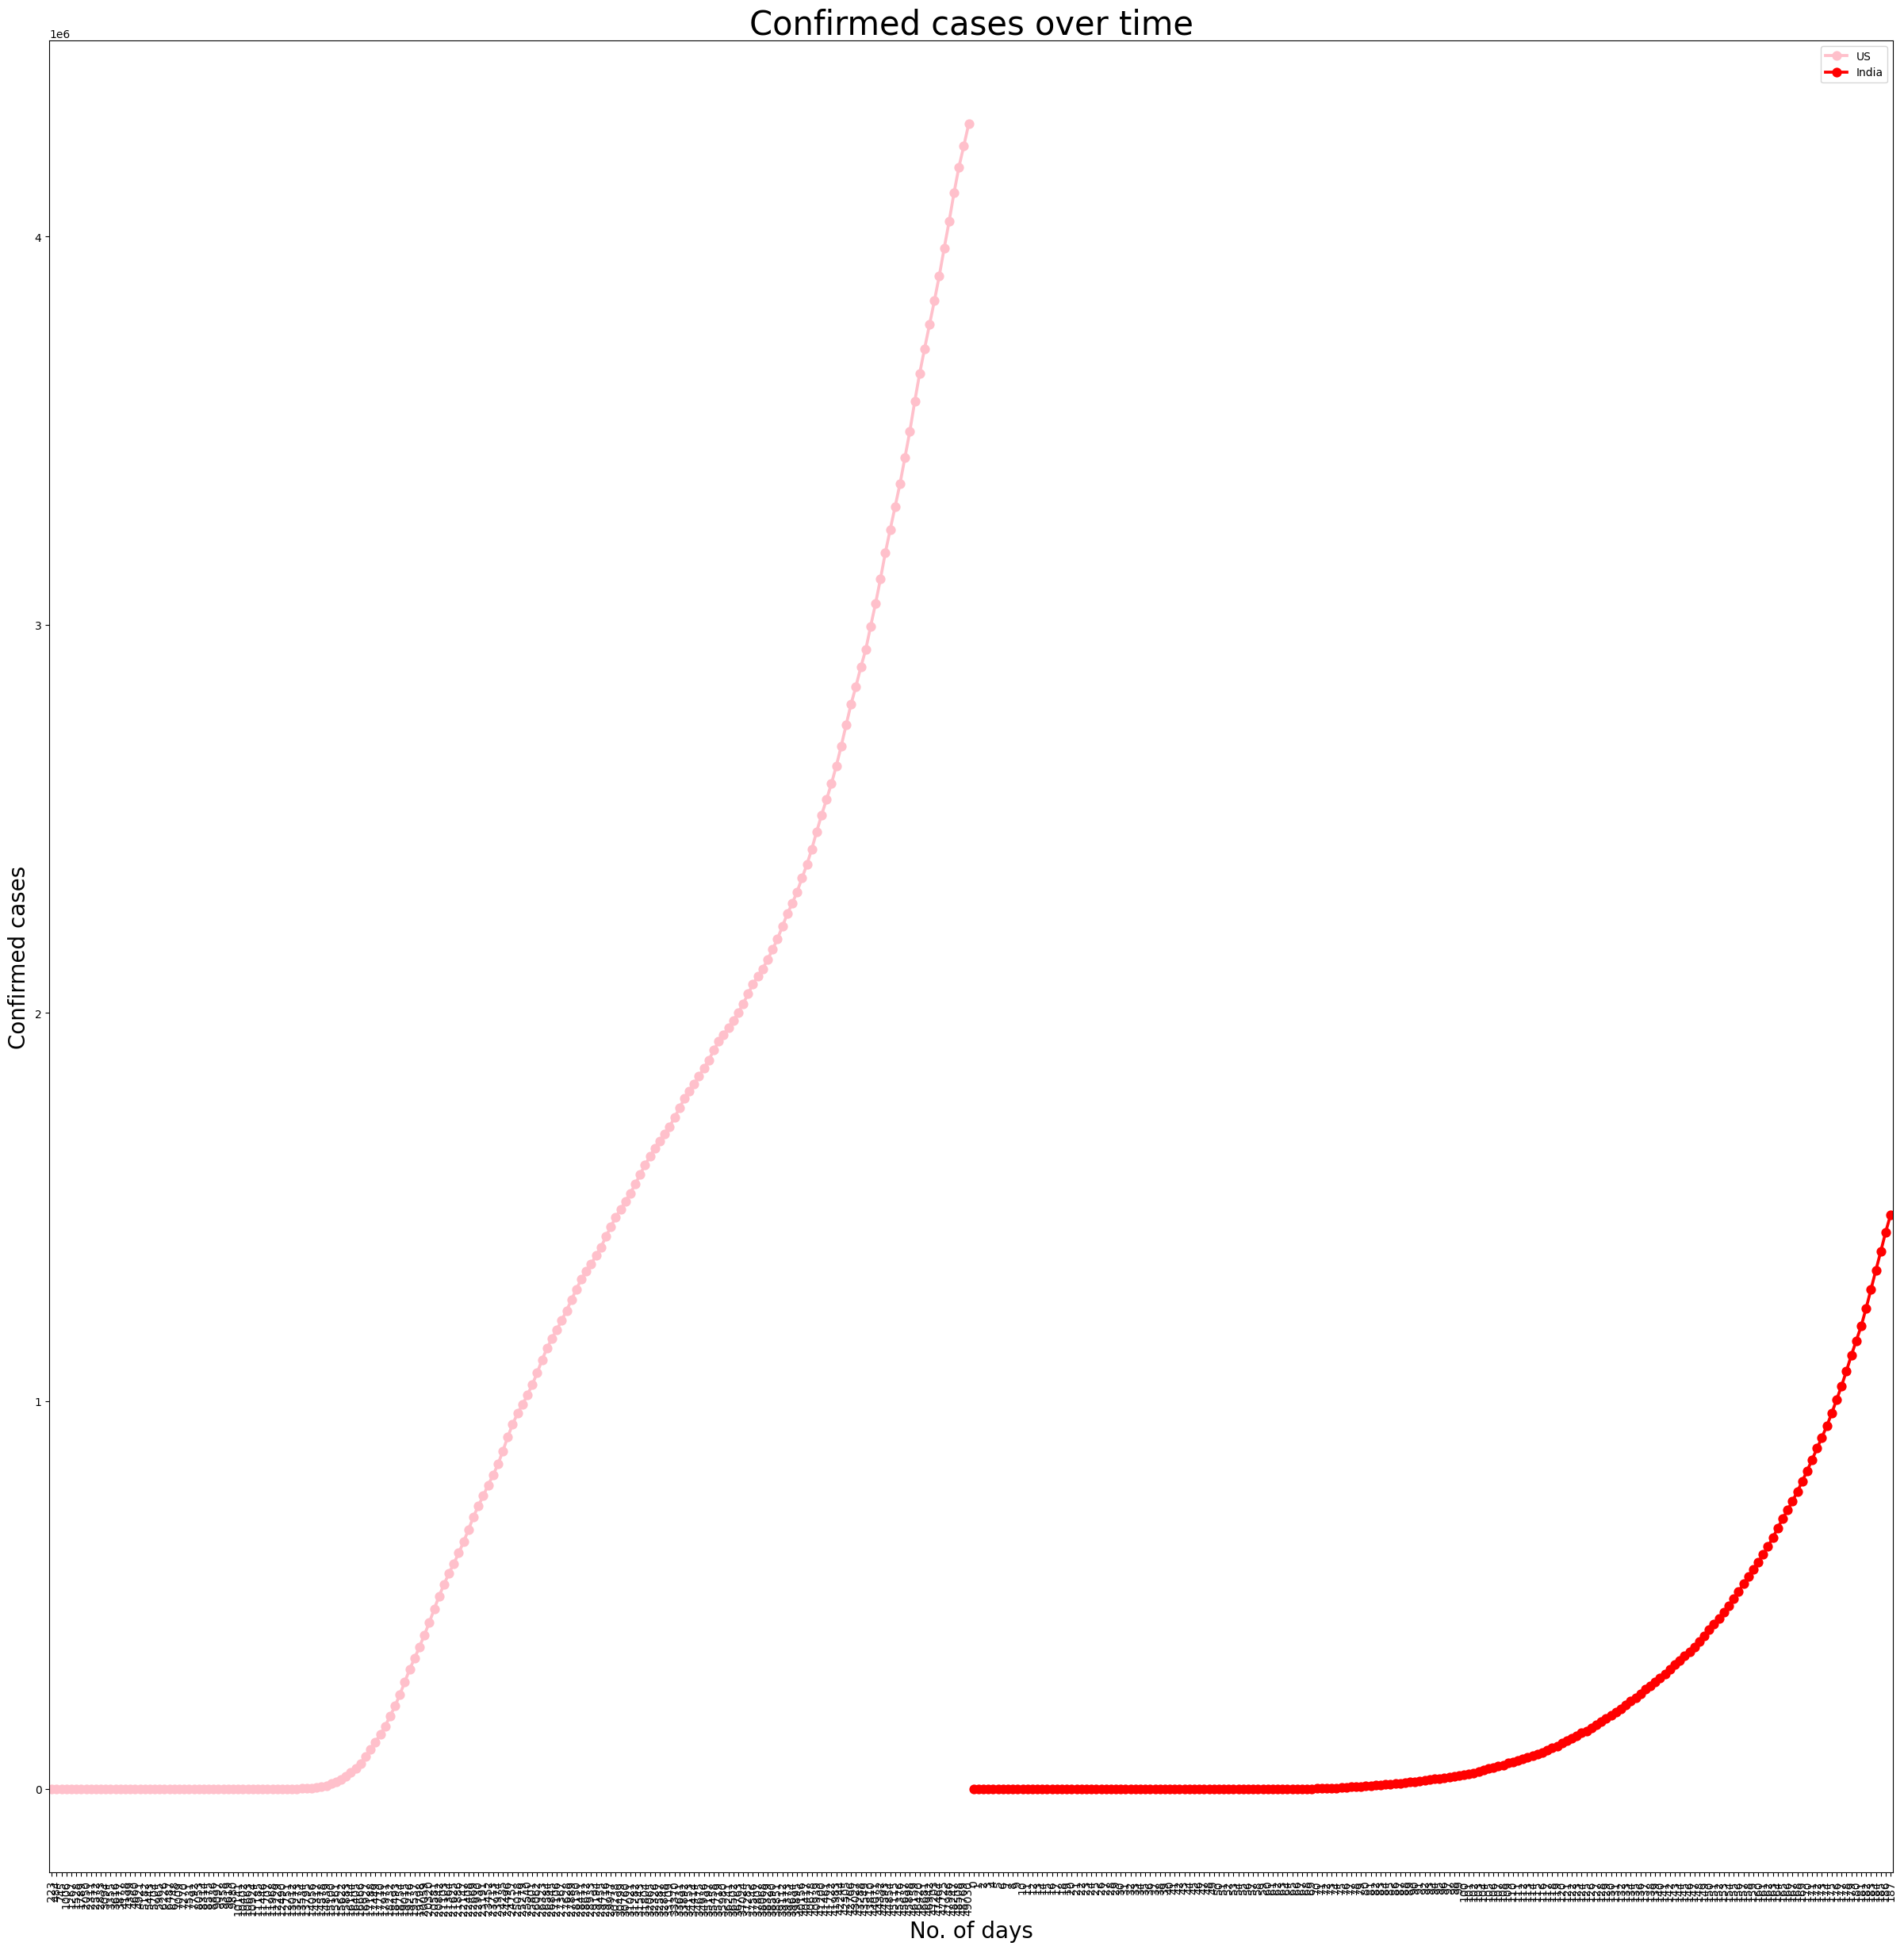

In [23]:
plt.figure(figsize=(30,30))

sns.pointplot(data=US, x=US.index, y='confirmed', color="Pink", label="US")
sns.pointplot(data=India, x=India.index, y='confirmed', color="Red", label="India")

plt.xlabel('No. of days', fontsize=20)
plt.ylabel('Confirmed cases', fontsize=20)
plt.title('Confirmed cases over time', fontsize=30)
plt.xticks(rotation=90)
# Adding a legend to distinguish the countries
plt.legend()

plt.show()

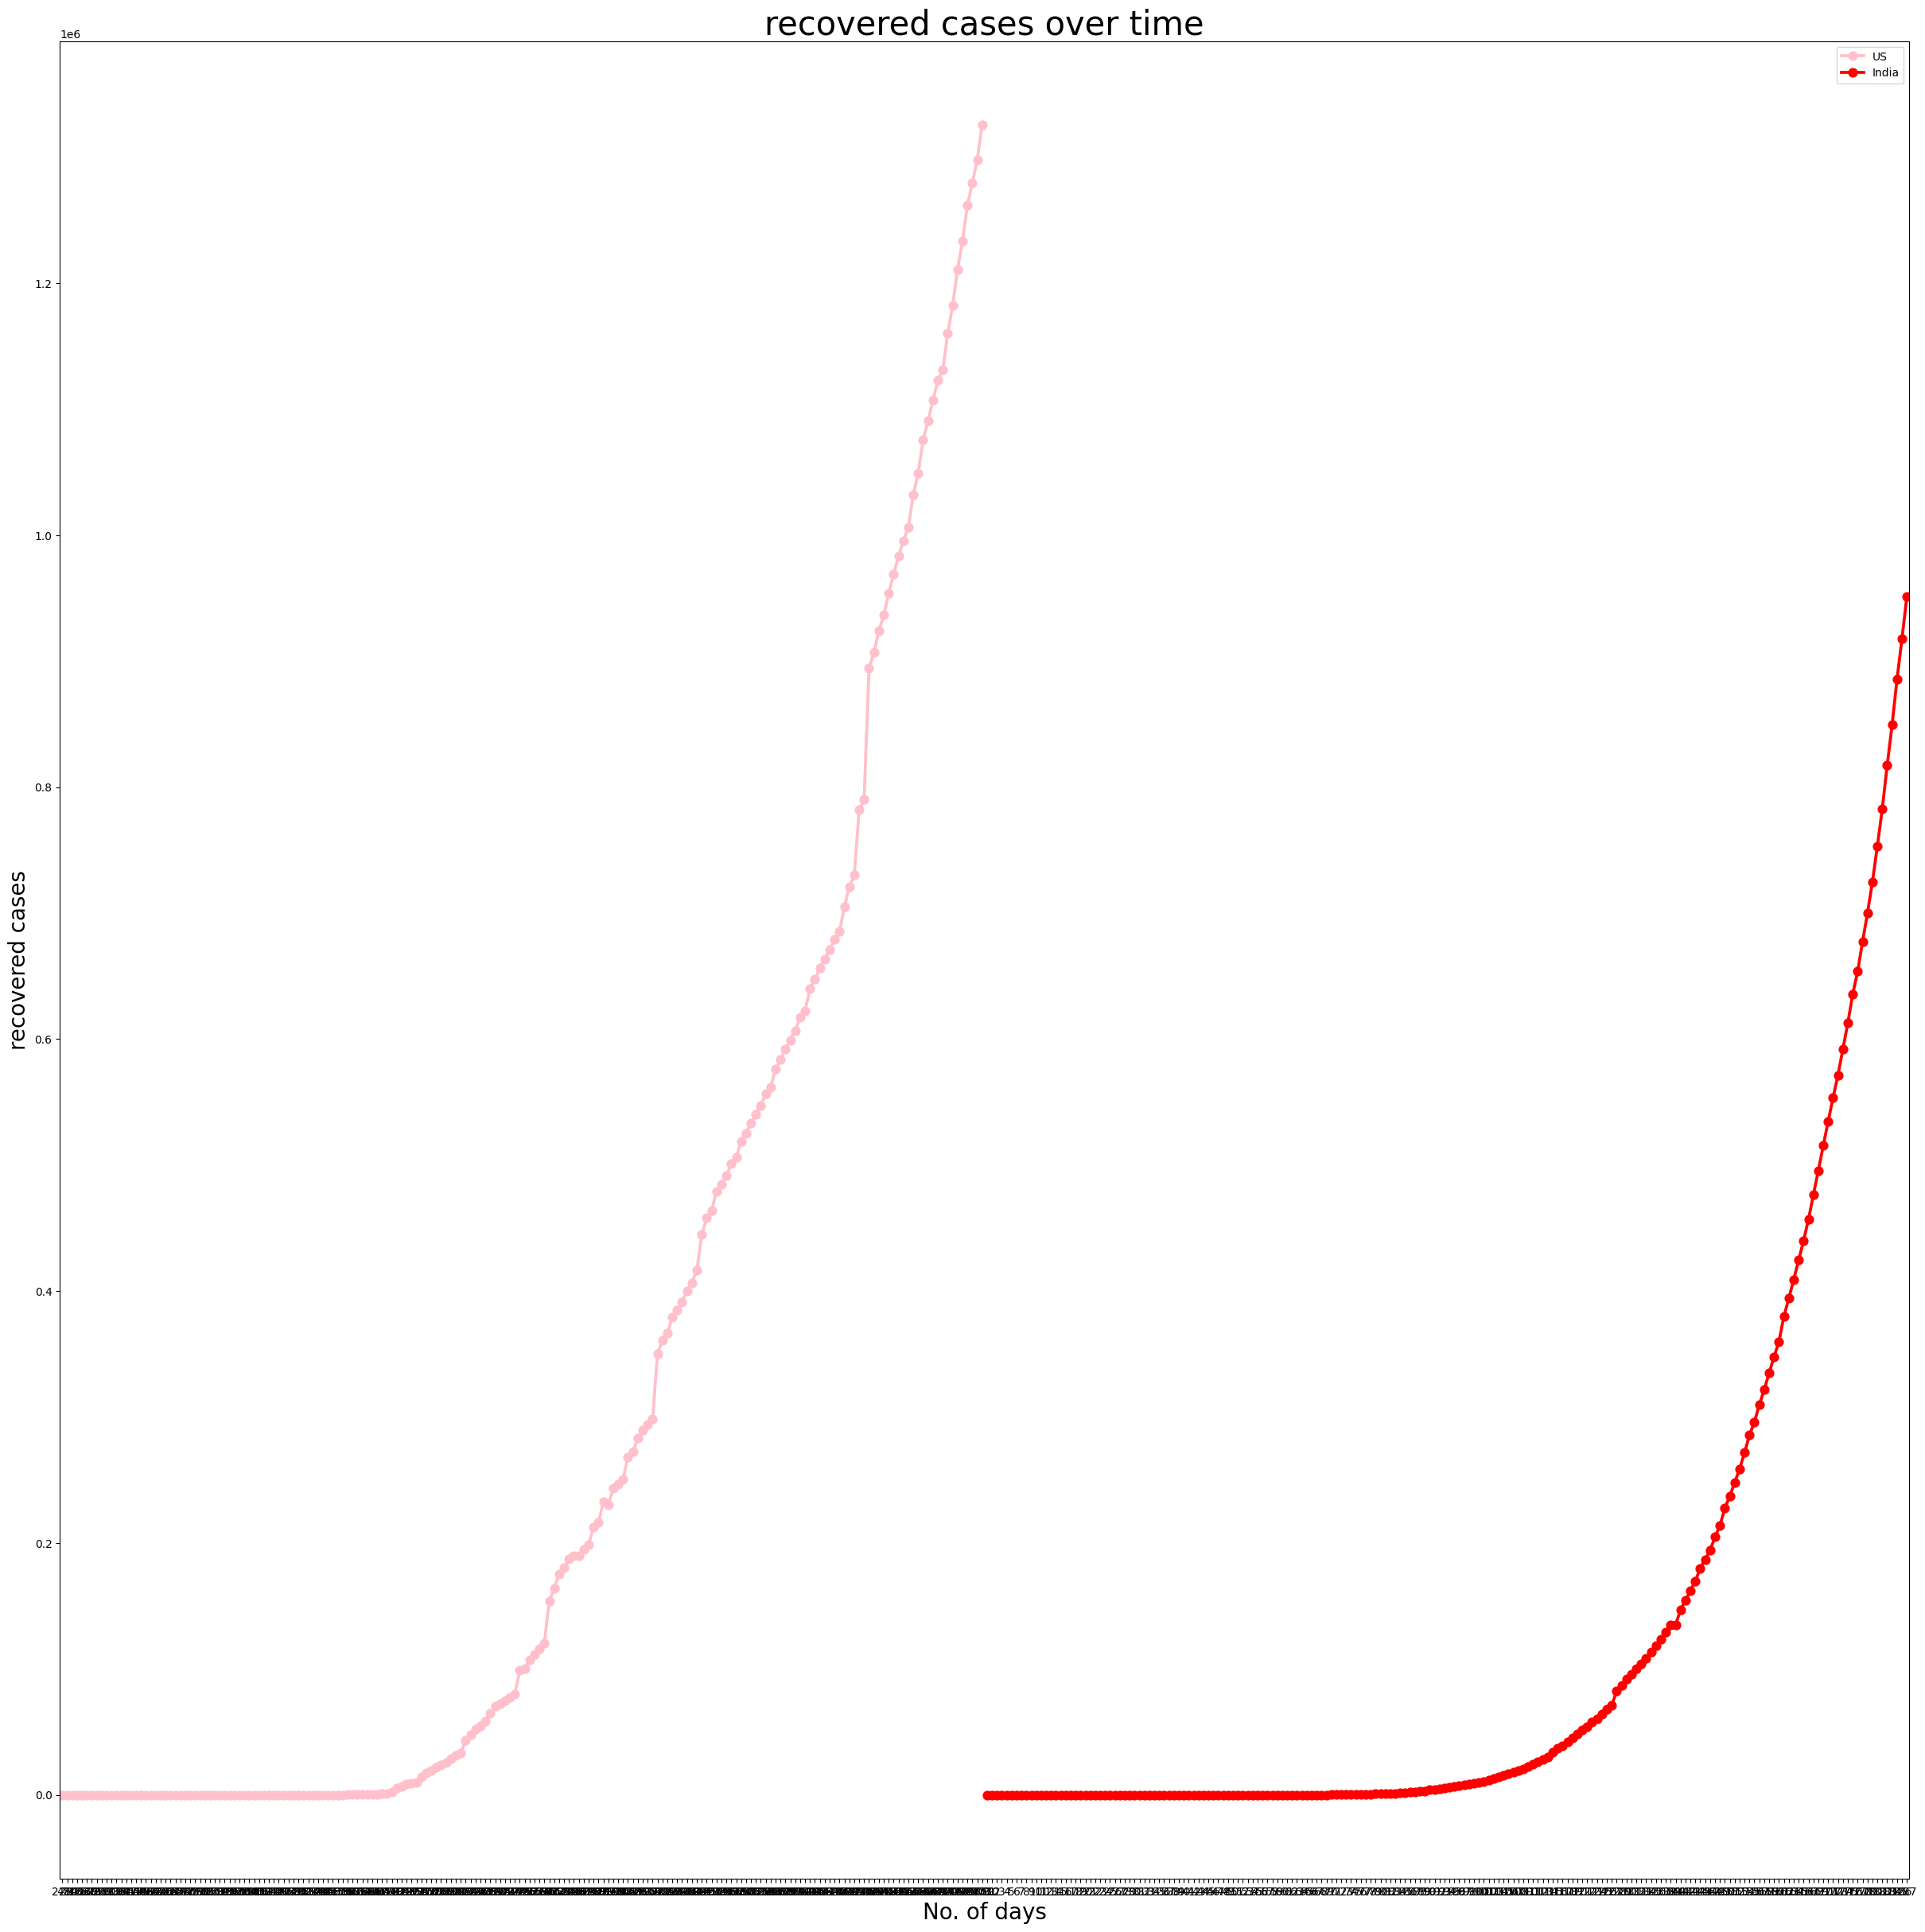

In [24]:
plt.figure(figsize=(30,30))

sns.pointplot(data=US, x=US.index, y='recovered', color="Pink", label="US")
sns.pointplot(data=India, x=India.index, y='recovered', color="Red", label="India")

plt.xlabel('No. of days', fontsize=20)
plt.ylabel('recovered cases', fontsize=20)
plt.title('recovered cases over time', fontsize=30)

# Adding a legend to distinguish the countries
plt.legend()

plt.show()

**FORECASTING USING FBPROPHET**

The input to Prophet is always a dataframe with two columns: ds and y. The ds (datestamp) column should be of a format expected by Pandas, ideally YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a timestamp. The y column must be numeric, and represents the measurement we wish to forecast.

In [25]:
pip install prophet

In [26]:
from prophet import Prophet

In [27]:
data.head()

,state,country,lat,long,date,confirmed,deaths,recovered,active,WHO
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [28]:
data.groupby("date").sum().head()

,state,country,lat,long,confirmed,deaths,recovered,active,WHO
date,,,,,,,,,
2020-01-22,Australian Capital TerritoryNew South WalesNor...,AfghanistanAlbaniaAlgeriaAndorraAngolaAntigua ...,5594.20365,6140.869714,555,17,28,510,Eastern MediterraneanEuropeAfricaEuropeAfricaA...
2020-01-23,Australian Capital TerritoryNew South WalesNor...,AfghanistanAlbaniaAlgeriaAndorraAngolaAntigua ...,5594.20365,6140.869714,654,18,30,606,Eastern MediterraneanEuropeAfricaEuropeAfricaA...
2020-01-24,Australian Capital TerritoryNew South WalesNor...,AfghanistanAlbaniaAlgeriaAndorraAngolaAntigua ...,5594.20365,6140.869714,941,26,36,879,Eastern MediterraneanEuropeAfricaEuropeAfricaA...
2020-01-25,Australian Capital TerritoryNew South WalesNor...,AfghanistanAlbaniaAlgeriaAndorraAngolaAntigua ...,5594.20365,6140.869714,1434,42,39,1353,Eastern MediterraneanEuropeAfricaEuropeAfricaA...
2020-01-26,Australian Capital TerritoryNew South WalesNor...,AfghanistanAlbaniaAlgeriaAndorraAngolaAntigua ...,5594.20365,6140.869714,2118,56,52,2010,Eastern MediterraneanEuropeAfricaEuropeAfricaA...


In [29]:
confirmed = data.groupby("date").sum()["confirmed"].reset_index()
death = data.groupby("date").sum()["deaths"].reset_index()
recovered = data.groupby("date").sum()["recovered"].reset_index()

In [30]:
confirmed

,date,confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


In [31]:
recovered

,date,recovered
0,2020-01-22,28
1,2020-01-23,30
2,2020-01-24,36
3,2020-01-25,39
4,2020-01-26,52
...,...,...
183,2020-07-23,8710969
184,2020-07-24,8939705
185,2020-07-25,9158743
186,2020-07-26,9293464


In [32]:
death

,date,deaths
0,2020-01-22,17
1,2020-01-23,18
2,2020-01-24,26
3,2020-01-25,42
4,2020-01-26,56
...,...,...
183,2020-07-23,633506
184,2020-07-24,639650
185,2020-07-25,644517
186,2020-07-26,648621


**FORECAST ON CONFIRMED CASE:**

In [33]:
confirmed.columns = ["ds","y"]
confirmed["ds"] = pd.to_datetime(confirmed["ds"])
confirmed.tail()

,ds,y
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796
187,2020-07-27,16480485


In [34]:
m = Prophet(interval_width = 0.95)
m.fit(confirmed)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzwp7_eio/t_cjdweu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzwp7_eio/triis9rn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50907', 'data', 'file=/tmp/tmpzwp7_eio/t_cjdweu.json', 'init=/tmp/tmpzwp7_eio/triis9rn.json', 'output', 'file=/tmp/tmpzwp7_eio/prophet_model187irdo7/prophet_model-20240526172436.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:24:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:24:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [35]:
future = m.make_future_dataframe(periods=7,freq="D")   ## creating future data frame for forecasting
future.tail(7)

,ds
188,2020-07-28
189,2020-07-29
190,2020-07-30
191,2020-07-31
192,2020-08-01
193,2020-08-02
194,2020-08-03


In [36]:
forecast = m.predict(future)
forecast[["ds","yhat","yhat_lower","yhat_upper"]].tail(7)

,ds,yhat,yhat_lower,yhat_upper
188,2020-07-28,1.632020e+07,1.616154e+07,1.647940e+07
189,2020-07-29,1.652997e+07,1.635976e+07,1.668625e+07
190,2020-07-30,1.674391e+07,1.659433e+07,1.691572e+07
191,2020-07-31,1.695910e+07,1.679568e+07,1.713227e+07
192,2020-08-01,1.716676e+07,1.699796e+07,1.733080e+07
193,2020-08-02,1.736430e+07,1.719042e+07,1.753556e+07
194,2020-08-03,1.755889e+07,1.737995e+07,1.774056e+07


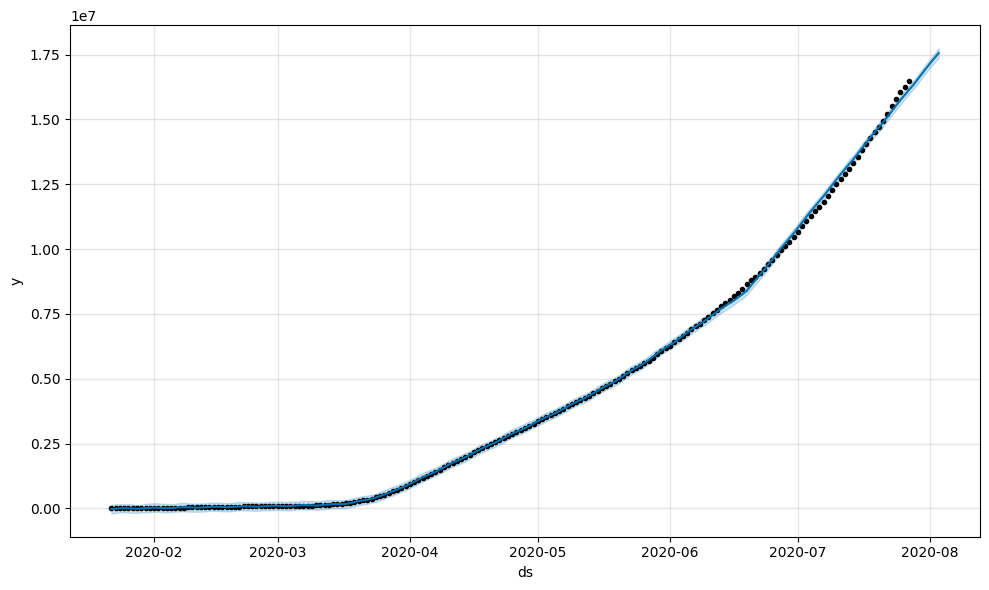

In [37]:
confirmed_forecast_plot = m.plot(forecast)

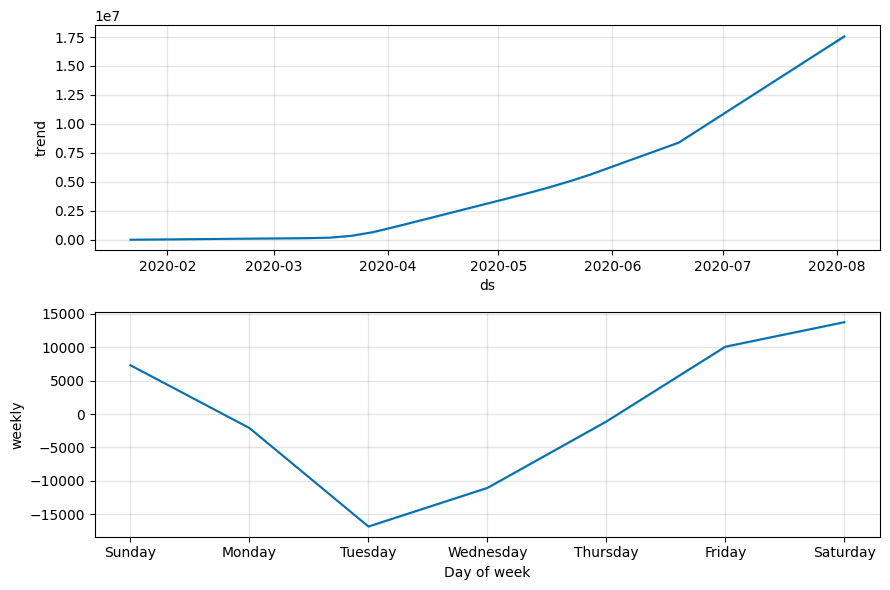

In [38]:
confirmed_forecast_plot = m.plot_components(forecast)

In [39]:
recovered.columns = ["ds","y"]
recovered["ds"] = pd.to_datetime(recovered["ds"])
recovered.tail()

,ds,y
183,2020-07-23,8710969
184,2020-07-24,8939705
185,2020-07-25,9158743
186,2020-07-26,9293464
187,2020-07-27,9468087


In [40]:
m = Prophet(interval_width = 0.95)
m.fit(recovered)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzwp7_eio/86p02je0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzwp7_eio/cxr6nirz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49204', 'data', 'file=/tmp/tmpzwp7_eio/86p02je0.json', 'init=/tmp/tmpzwp7_eio/cxr6nirz.json', 'output', 'file=/tmp/tmpzwp7_eio/prophet_modellbytg8dy/prophet_model-20240526172446.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:24:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:24:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [41]:
future = m.make_future_dataframe(periods=7,freq="D")   ## creating future data frame for forecasting
future.tail(7)

,ds
188,2020-07-28
189,2020-07-29
190,2020-07-30
191,2020-07-31
192,2020-08-01
193,2020-08-02
194,2020-08-03


In [42]:
forecast = m.predict(future)
forecast[["ds","yhat","yhat_lower","yhat_upper"]].tail(7)

,ds,yhat,yhat_lower,yhat_upper
188,2020-07-28,9.311028e+06,9.186321e+06,9.435790e+06
189,2020-07-29,9.453130e+06,9.330317e+06,9.572804e+06
190,2020-07-30,9.595783e+06,9.475521e+06,9.715598e+06
191,2020-07-31,9.737182e+06,9.619560e+06,9.860780e+06
192,2020-08-01,9.877343e+06,9.750085e+06,9.992540e+06
193,2020-08-02,1.000332e+07,9.870341e+06,1.013377e+07
194,2020-08-03,1.013982e+07,9.992419e+06,1.027784e+07


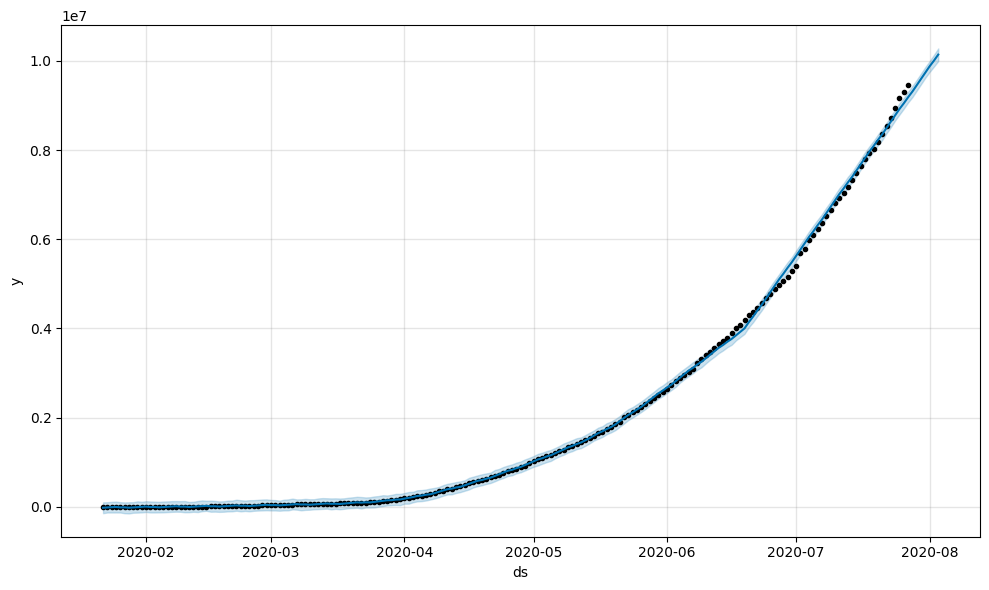

In [43]:
confirmed_forecast_plot = m.plot(forecast)